<a href="https://www.kaggle.com/code/aliraza48/netflix-revenue-and-subscribers?scriptVersionId=134043666" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import warnings


In [2]:
df = pd.read_csv("/kaggle/input/netflix-ott-revenue-and-subscribers-csv-file/Netflix Revenue.csv")
df.head()

,Date,Global Revenue,UACN Revenue,EMEA Revenue,LATM Revenue,APAC Revenue,UACN Members,EMEA Members,LATM Members,APAC Members,...,EMEA RPU,LATM RPU,APAC RPU,Domestic Members,Domestic Revenue,International Members,International Revenue,Domestic Free Trialers,Interntaional Free Trialers,Netflix Global Users
0,31-03-2012,869791000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,506665000.0,506665000.0,2409000.0,43425000.0,NaN,NaN,"50,90,74,000"
1,30-06-2012,889163000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,532705000.0,532705000.0,3024000.0,64973000.0,NaN,NaN,"53,57,29,000"
2,30-09-2012,905089000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,556027000.0,556027000.0,3689000.0,77744000.0,NaN,NaN,"55,97,16,000"
3,31-12-2012,945239000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,589471000.0,589471000.0,4892000.0,101400000.0,NaN,NaN,"59,43,63,000"
4,31-03-2013,1023961000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,638649000.0,638649000.0,6331000.0,142019000.0,NaN,NaN,"64,49,80,000"


In [3]:
df.shape

(45, 21)

In [4]:
df.describe()

,Global Revenue,UACN Revenue,EMEA Revenue,LATM Revenue,APAC Revenue,UACN Members,EMEA Members,LATM Members,APAC Members,UACN RPU,EMEA RPU,LATM RPU,APAC RPU,Domestic Members,Domestic Revenue,International Members,International Revenue,Domestic Free Trialers,Interntaional Free Trialers
count,4.500000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,17.000000,17.000000,17.000000,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01,1.200000e+01,1.200000e+01
mean,3.804736e+09,3.068941e+09,2.075164e+09,8.629001e+08,6.830686e+08,7.207747e+07,6.418447e+07,3.635882e+07,2.628129e+07,14.200588,10.910000,8.004706,9.050000,1.084327e+09,1.084327e+09,2.956664e+07,7.265650e+08,1.498000e+06,3.873833e+06
std,2.559212e+09,4.209004e+08,4.594011e+08,1.349618e+08,2.204141e+08,3.129072e+06,1.149417e+07,4.624148e+06,8.939004e+06,1.432919,0.544059,0.508123,0.562361,4.402810e+08,4.402810e+08,2.372401e+07,6.444257e+08,2.989615e+05,1.435152e+06
min,8.697910e+08,2.256851e+09,1.233379e+09,6.304720e+08,3.196020e+08,6.650100e+07,4.254200e+07,2.754700e+07,1.214100e+07,11.450000,10.130000,7.120000,7.690000,5.066650e+08,5.066650e+08,2.409000e+06,4.342500e+07,1.018000e+06,2.156000e+06
25%,1.484728e+09,2.702776e+09,1.723474e+09,7.853680e+08,4.836600e+08,6.996900e+07,5.873400e+07,3.431800e+07,1.983500e+07,13.220000,10.430000,7.500000,8.940000,7.306862e+08,7.306862e+08,9.312500e+06,2.118262e+08,1.378250e+06,2.814500e+06
50%,2.984859e+09,3.170972e+09,2.343674e+09,8.366470e+08,7.624140e+08,7.338700e+07,6.850800e+07,3.789400e+07,2.685300e+07,14.250000,10.880000,8.140000,9.210000,1.036056e+09,1.036056e+09,2.280000e+07,4.858165e+08,1.493000e+06,3.558000e+06
75%,6.148286e+09,3.350424e+09,2.432239e+09,9.989480e+08,8.707050e+08,7.429600e+07,7.353400e+07,3.962400e+07,3.371900e+07,14.910000,11.560000,8.370000,9.320000,1.310108e+09,1.310108e+09,4.591925e+07,1.075956e+09,1.603000e+06,4.605750e+06
max,8.161503e+09,3.608645e+09,2.561831e+09,1.070192e+09,9.335230e+08,7.521500e+07,7.737300e+07,4.169900e+07,3.947800e+07,16.370000,11.660000,8.670000,9.740000,1.996092e+09,1.996092e+09,8.077300e+07,2.105592e+09,2.065000e+06,7.131000e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         45 non-null     object 
 1   Global Revenue               45 non-null     int64  
 2   UACN Revenue                 17 non-null     float64
 3   EMEA Revenue                 17 non-null     float64
 4   LATM Revenue                 17 non-null     float64
 5   APAC Revenue                 17 non-null     float64
 6   UACN Members                 17 non-null     float64
 7   EMEA  Members                17 non-null     float64
 8   LATM Members                 17 non-null     float64
 9   APAC Members                 17 non-null     float64
 10  UACN RPU                     17 non-null     float64
 11  EMEA RPU                     17 non-null     float64
 12  LATM  RPU                    17 non-null     float64
 13  APAC  RPU             

In [6]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
dtype: bool

In [7]:
df.columns

Index(['Date', 'Global Revenue', 'UACN Revenue', 'EMEA Revenue',
       'LATM Revenue', 'APAC Revenue', 'UACN Members', 'EMEA  Members',
       'LATM Members', 'APAC Members', 'UACN RPU', 'EMEA RPU', 'LATM  RPU',
       'APAC  RPU', 'Domestic Members', 'Domestic Revenue',
       'International Members', 'International Revenue',
       'Domestic Free Trialers', 'Interntaional Free Trialers',
       'Netflix Global Users'],
      dtype='object')

In [8]:
df.index

RangeIndex(start=0, stop=45, step=1)

In [9]:
df.isnull().sum()

Date                            0
Global Revenue                  0
UACN Revenue                   28
EMEA Revenue                   28
LATM Revenue                   28
APAC Revenue                   28
UACN Members                   28
EMEA  Members                  28
LATM Members                   28
APAC Members                   28
UACN RPU                       28
EMEA RPU                       28
LATM  RPU                      28
APAC  RPU                      28
Domestic Members               17
Domestic Revenue               17
International Members          17
International Revenue          17
Domestic Free Trialers         33
Interntaional Free Trialers    33
Netflix Global Users            0
dtype: int64

In [10]:
# slice rows till 2019
df['Date']= pd.to_datetime(df['Date'])

plt.figure(figsize=(15,10),dpi=700, facecolor= "yellow")
plt.plot(df['Date'],df["Netflix Global Users"],color= "red")
plt.xlabel("Date",fontdict= {'family':'fantasy','color':'black','size':15})
plt.xticks(rotation=90, ha='right')
plt.ylabel("Netflix Global Users in millions",fontdict= {'family':'fantasy','color':'black','size':15})
plt.title("Netflix Global Users vs Time", fontdict= {'family':'fantasy','color':'black','size':20})


# Modify the y-axis tick labels
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.2f}".format(x)))

plt.show()


/tmp/ipykernel_20/2300344949.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']= pd.to_datetime(df['Date'])


In [11]:
# Remove commas and convert 'Netflix Global Users' column to numeric
df['Netflix Global Users'] = df['Netflix Global Users'].str.replace(',', '').astype(float)

In [12]:
# Sort the dataframe by date
df = df.sort_values('Date')

# Plot the Global revenue over time
plt.figure(figsize=(15,10),dpi=700, facecolor= "yellow")
plt.plot(df['Date'],df["Global Revenue"],color= "red")
plt.title('Netflix Global Revenue Over Time', fontdict= {'family':'fantasy','color':'black','size':20})
plt.xlabel('Date',fontdict= {'family':'fantasy','color':'black','size':15})
plt.xticks(rotation=90, ha='right')
plt.ylabel("Netflix Global Revenue",fontdict= {'family':'fantasy','color':'black','size':15})

# Modify the y-axis tick labels
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.2f}".format(x)))

plt.show()

In [13]:
df['Year'] = pd.to_datetime(df['Date']).dt.year

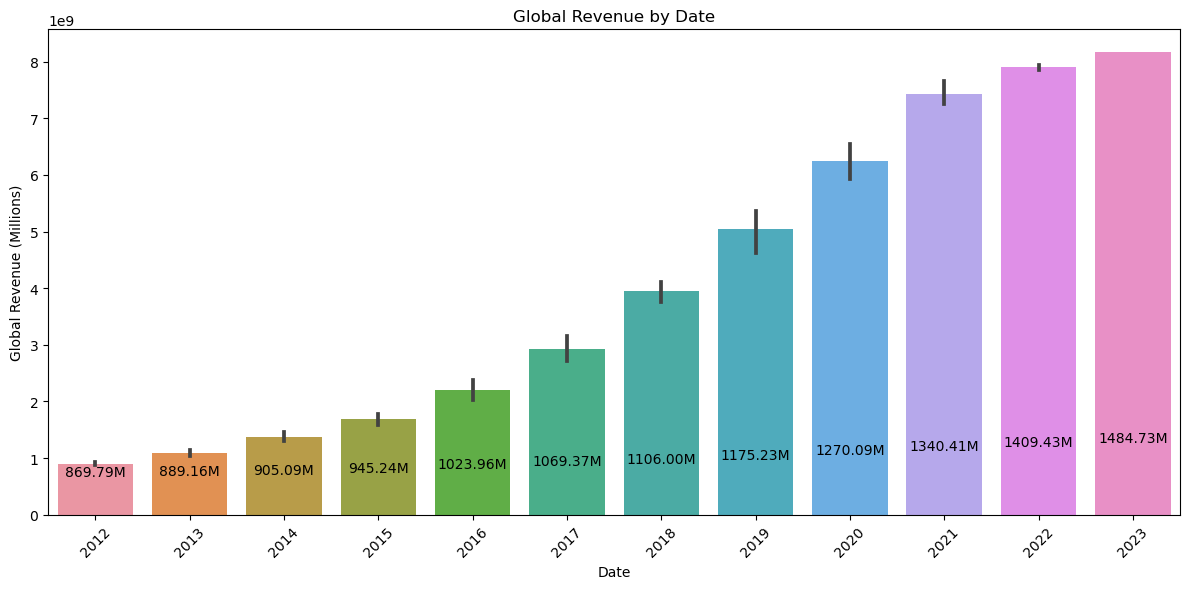

In [14]:
# Bar chart for Global Revenue by Date
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Year'], y=df['Global Revenue'])
plt.xlabel('Date')
plt.ylabel('Global Revenue (Millions)')
plt.title('Global Revenue by Date')

# Add value labels in millions
for i, value in enumerate(df['Global Revenue']):
    plt.annotate('{:.2f}M'.format(value/1_000_000), (i, value), ha='center', va='top')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

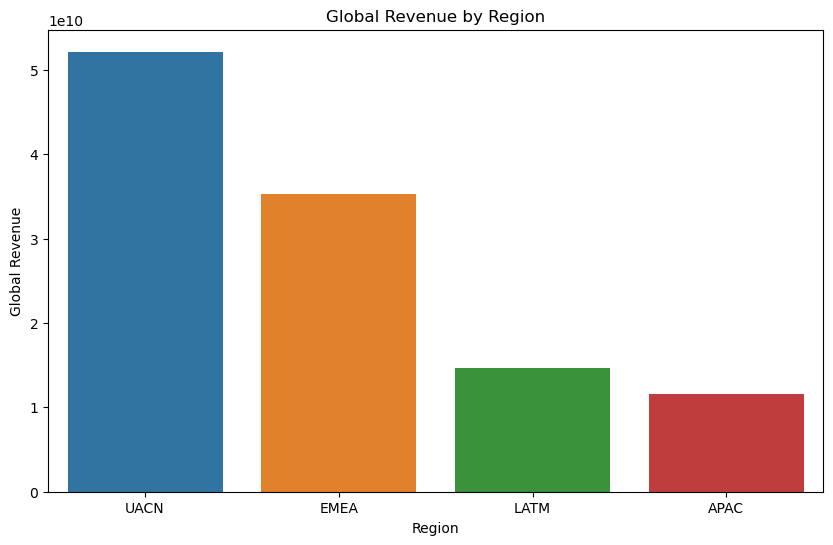

In [15]:
# Bar plot for Global Revenue by Region
region_revenue_columns = ['UACN Revenue', 'EMEA Revenue', 'LATM Revenue', 'APAC Revenue']
region_revenue_labels = ['UACN', 'EMEA', 'LATM', 'APAC']
region_revenue_values = df[region_revenue_columns].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=region_revenue_labels, y=region_revenue_values)
plt.xlabel('Region')
plt.ylabel('Global Revenue')
plt.title('Global Revenue by Region')
plt.show()

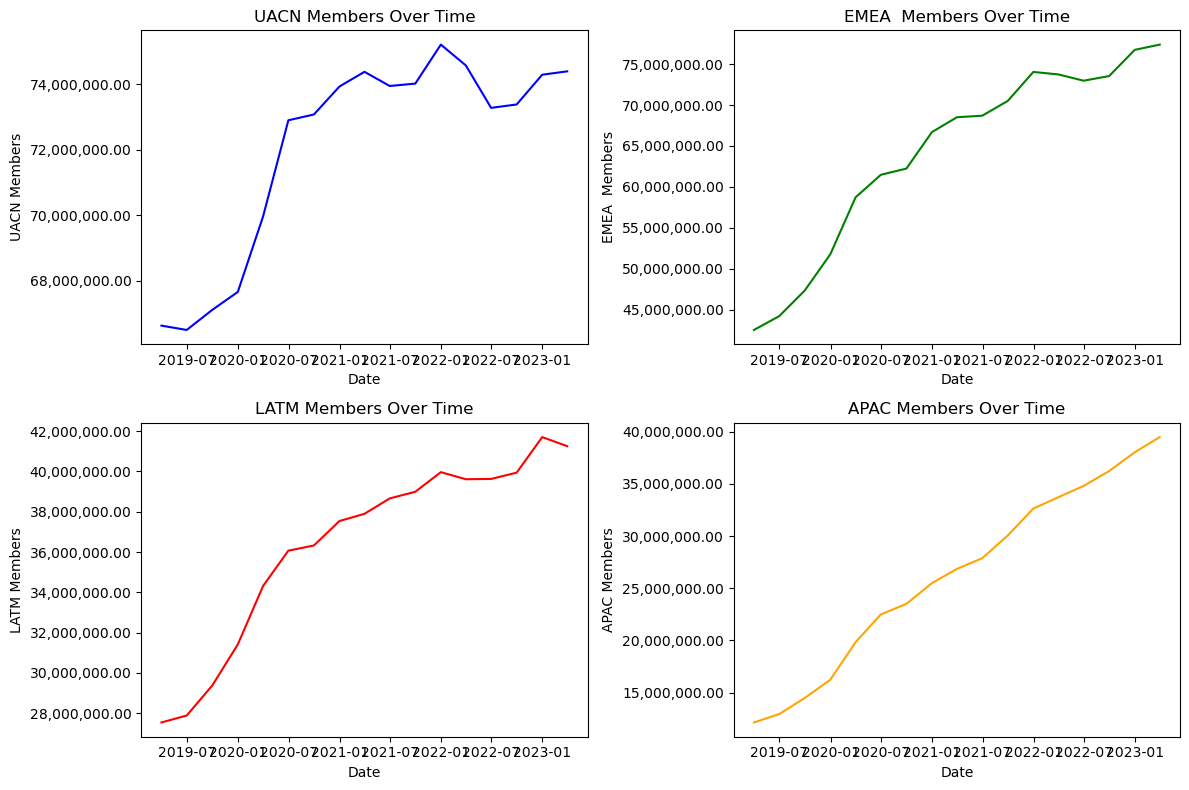

In [16]:

# Define colors for each region
colors = ['blue', 'green', 'red', 'orange']

# Plotting subscribers in different regions
regions = ['UACN', 'EMEA ', 'LATM', 'APAC']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, region in enumerate(regions):
    region_members_column = f'{region} Members'
    axes[i].plot(df['Date'], df[region_members_column], color=colors[i])
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(f'{region} Members')
    axes[i].set_title(f'{region} Members Over Time')
    # Format y-axis tick labels with comma separator
    axes[i].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, loc: "{:,.2f}".format(x)))

plt.tight_layout()
plt.show()

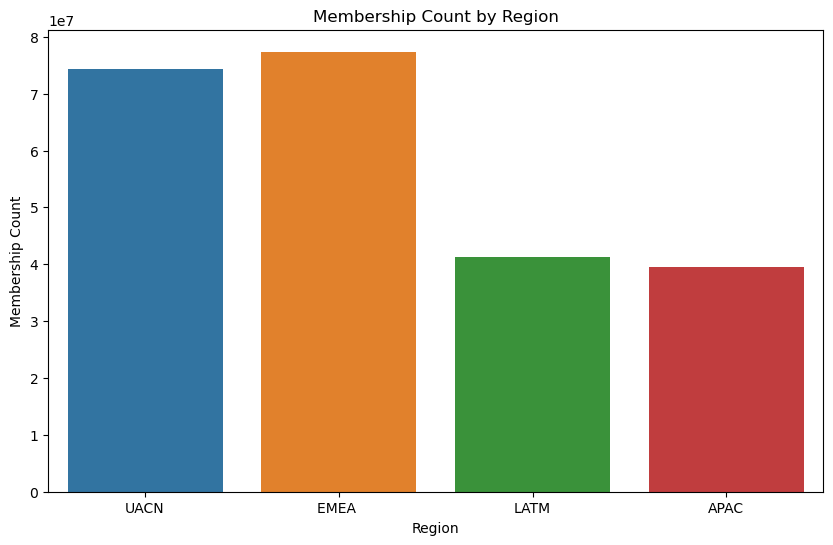

In [17]:
# Bar plot for Membership Count by Region
membership_columns = ['UACN Members', 'EMEA  Members', 'LATM Members', 'APAC Members']

plt.figure(figsize=(10, 6))
sns.barplot(x=regions, y=df[membership_columns].iloc[-1])
plt.xlabel('Region')
plt.ylabel('Membership Count')
plt.title('Membership Count by Region')
plt.show()

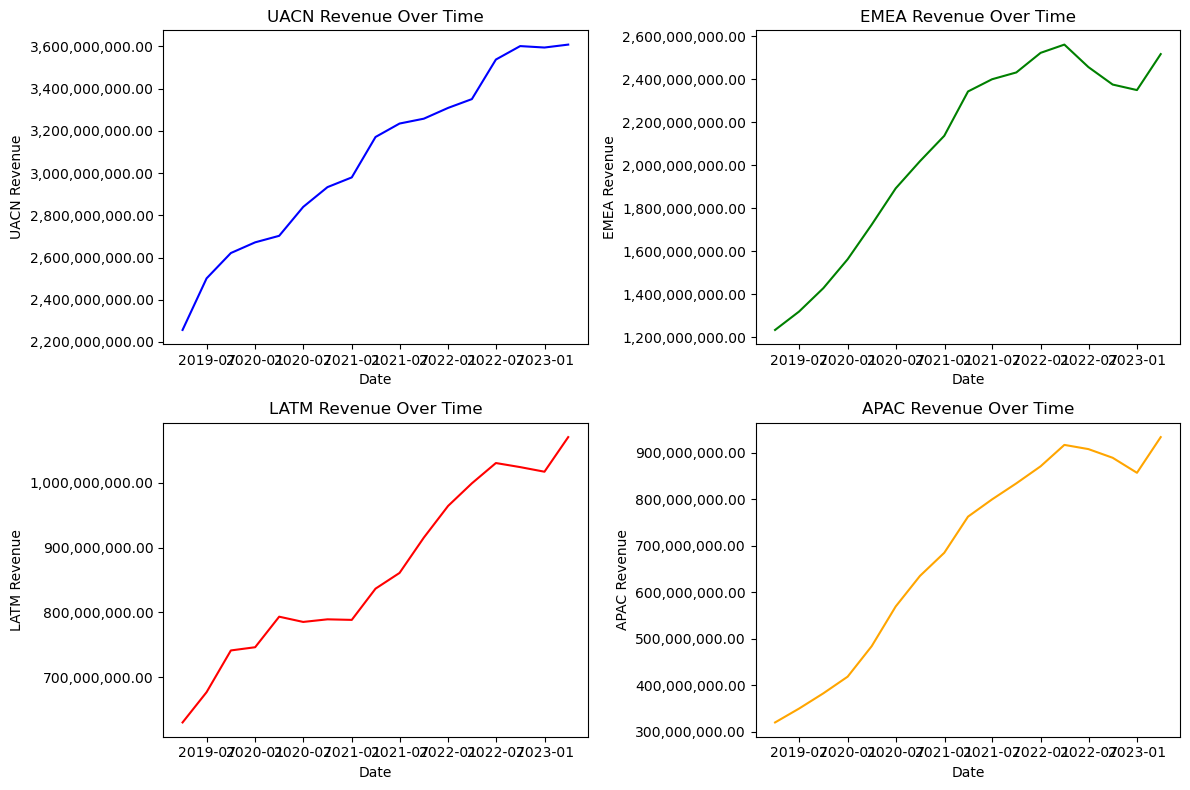

In [18]:
colors = ['blue', 'green', 'red', 'orange']

# Plotting subscribers in different regions
regions = ['UACN', 'EMEA', 'LATM', 'APAC']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, region in enumerate(regions):
    region_members_column = f'{region} Revenue'
    axes[i].plot(df['Date'], df[region_members_column], color=colors[i])
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(f'{region} Revenue')
    axes[i].set_title(f'{region} Revenue Over Time')
        # Format y-axis tick labels with comma separator
    axes[i].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, loc: "{:,.2f}".format(x)))

plt.tight_layout()
plt.show()

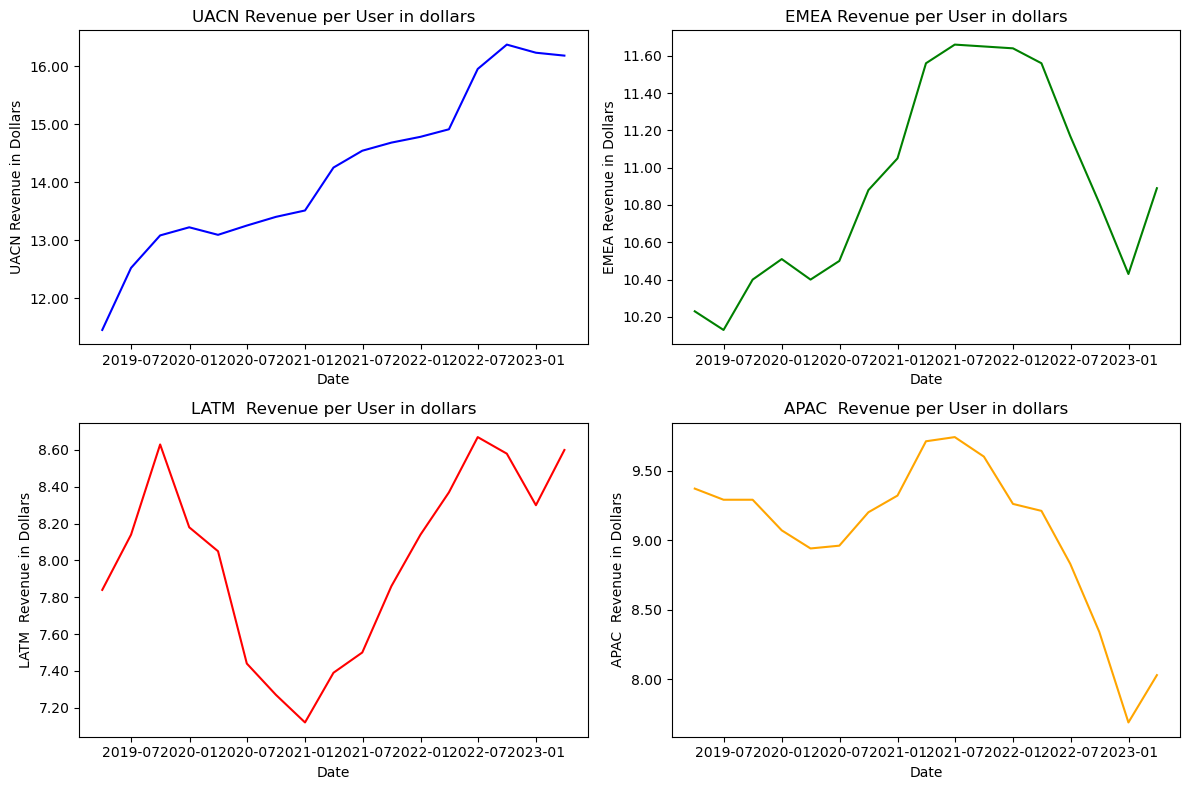

In [19]:
colors = ['blue', 'green', 'red', 'orange']

# Plotting subscribers in different regions
regions = ['UACN', 'EMEA', 'LATM ', 'APAC ']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, region in enumerate(regions):
    region_members_column = f'{region} RPU'
    axes[i].plot(df['Date'], df[region_members_column], color=colors[i])
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(f'{region} Revenue in Dollars')
    axes[i].set_title(f'{region} Revenue per User in dollars')
        # Format y-axis tick labels with comma separator
    axes[i].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, loc: "{:,.2f}".format(x)))

plt.tight_layout()
plt.show()


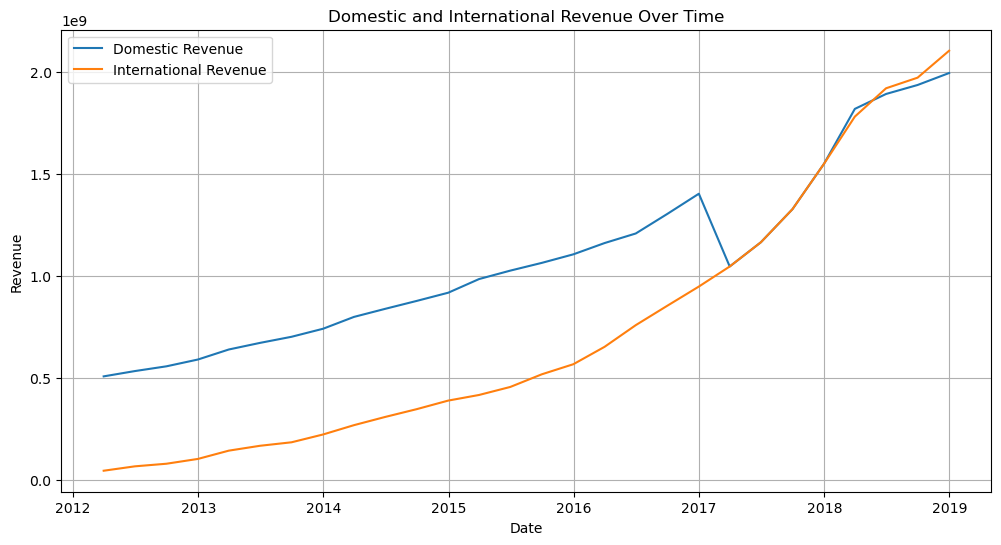

In [20]:
# Line plot for Domestic and International Revenue over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Domestic Revenue'], label='Domestic Revenue')
plt.plot(df['Date'], df['International Revenue'], label='International Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Domestic and International Revenue Over Time')
plt.legend()
plt.grid(True)
plt.show()

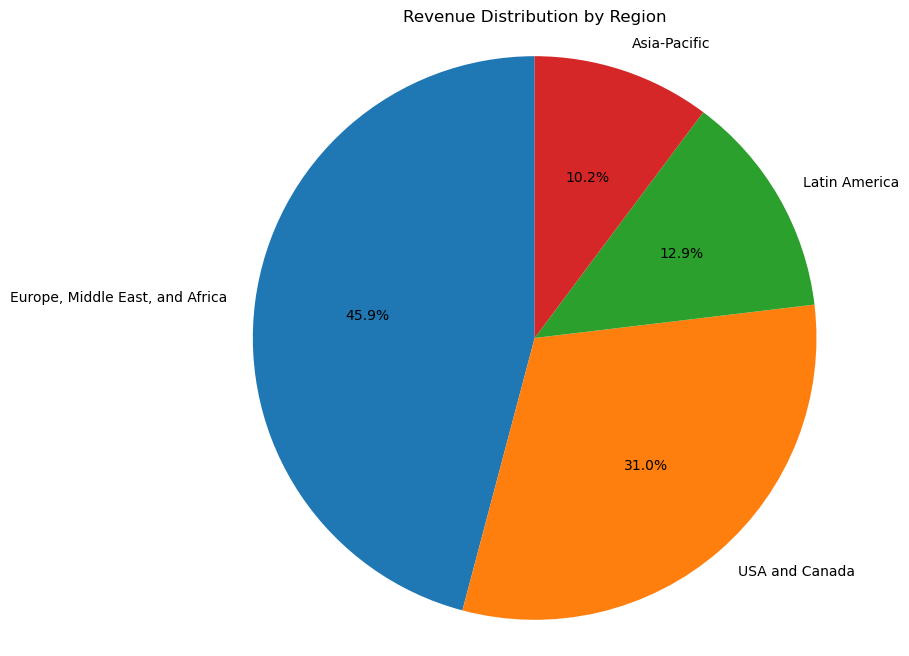

In [21]:
# Modify region labels
region_revenue_labels_updated = ['Europe, Middle East, and Africa', 'USA and Canada', 'Latin America', 'Asia-Pacific']

# Calculate revenue percentages
total_revenue = df[region_revenue_columns].sum().sum()
region_revenue_percentages = df[region_revenue_columns].sum() / total_revenue * 100

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_revenue_percentages, labels=region_revenue_labels_updated, autopct='%1.1f%%', startangle=90)
plt.title('Revenue Distribution by Region')
plt.axis('equal')
plt.show()


In [22]:
numeric_columns = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
correlation_matrix

,Global Revenue,UACN Revenue,EMEA Revenue,LATM Revenue,APAC Revenue,UACN Members,EMEA Members,LATM Members,APAC Members,UACN RPU,...,LATM RPU,APAC RPU,Domestic Members,Domestic Revenue,International Members,International Revenue,Domestic Free Trialers,Interntaional Free Trialers,Netflix Global Users,Year
Global Revenue,1.000000,0.984637,0.981508,0.953678,0.995674,0.909517,0.983320,0.970493,0.981188,0.938344,...,0.216318,-0.373797,0.971997,0.971997,0.997304,0.998642,0.674624,0.907299,-0.499270,0.971891
UACN Revenue,0.984637,1.000000,0.935646,0.969540,0.968841,0.849195,0.959383,0.946043,0.984115,0.981924,...,0.308462,-0.491438,NaN,NaN,NaN,NaN,NaN,NaN,0.965704,0.952423
EMEA Revenue,0.981508,0.935646,1.000000,0.888619,0.987312,0.954915,0.978013,0.969922,0.938069,0.857769,...,0.065510,-0.219100,NaN,NaN,NaN,NaN,NaN,NaN,0.974469,0.895616
LATM Revenue,0.953678,0.969540,0.888619,1.000000,0.936524,0.772525,0.923267,0.899528,0.972761,0.971511,...,0.476681,-0.564715,NaN,NaN,NaN,NaN,NaN,NaN,0.930766,0.961298
APAC Revenue,0.995674,0.968841,0.987312,0.936524,1.000000,0.920494,0.978029,0.964209,0.973367,0.910823,...,0.178165,-0.324344,NaN,NaN,NaN,NaN,NaN,NaN,0.980998,0.941797
UACN Members,0.909517,0.849195,0.954915,0.772525,0.920494,1.000000,0.949132,0.959341,0.872868,0.739192,...,-0.172727,-0.184147,NaN,NaN,NaN,NaN,NaN,NaN,0.944888,0.802431
EMEA Members,0.983320,0.959383,0.978013,0.923267,0.978029,0.949132,1.000000,0.996171,0.973502,0.899332,...,0.111265,-0.394679,NaN,NaN,NaN,NaN,NaN,NaN,0.998660,0.922809
LATM Members,0.970493,0.946043,0.969922,0.899528,0.964209,0.959341,0.996171,1.000000,0.960312,0.880935,...,0.054243,-0.390533,NaN,NaN,NaN,NaN,NaN,NaN,0.994623,0.901213
APAC Members,0.981188,0.984115,0.938069,0.972761,0.973367,0.872868,0.973502,0.960312,1.000000,0.954789,...,0.282914,-0.530011,NaN,NaN,NaN,NaN,NaN,NaN,0.981682,0.970205
UACN RPU,0.938344,0.981924,0.857769,0.971511,0.910823,0.739192,0.899332,0.880935,0.954789,1.000000,...,0.454502,-0.590192,NaN,NaN,NaN,NaN,NaN,NaN,0.908255,0.933943


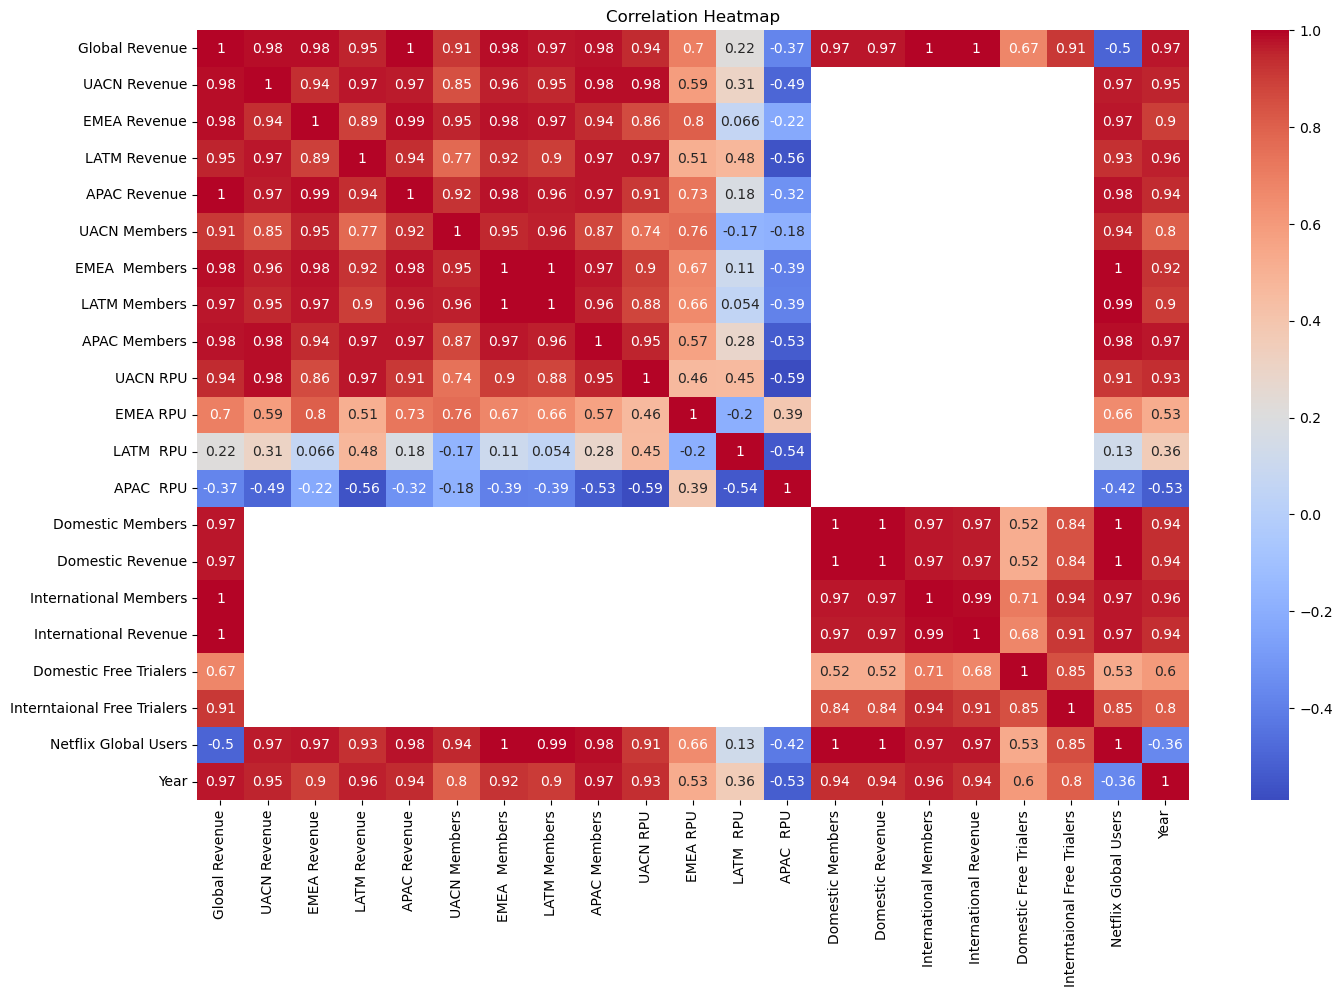

In [23]:
# Correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# These Visualizations are showing the trend in Subscriptions and Revenue over the time period 2012-2022